In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import RobotManyDofs
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, cart_to_joint_dynamic
from ppr.sampling import get_shortest_path

In [2]:
# FIRST EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=1.5)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)

# PATH circle with centre segment c and radius R, N path points
c = [6, 2]; R = 1.2; N = 10;
t = np.linspace(np.pi, 3 * np.pi/2, N)
x = R * np.cos(t) + c[0]
y = R * np.sin(t) + c[1]
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

sc1 = []
sc1.append(Rectangle(3, 0, 0.2, 2, 0))
sc1.append(Rectangle(4, 0, 2, 0.2, 0))

In [11]:
# SECOND EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=2)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)
robot1.do_check_self_collision = True

# PATH line in gap
N = 5
G = 0.5
x = G / 2 * np.ones(N)
y = np.linspace(4, 6, N)
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

# collision scene small gap width G

sc1 = []
sc1.append(Rectangle(-2, 4, 2, 4, 0))
sc1.append(Rectangle( G, 4, 2, 4, 0))

In [36]:
# Third EXPERIMENT
# ROBOT
robot1 = RobotManyDofs(6, link_length=2)
robot1.set_joint_limits([(-np.pi / 2, np.pi / 2)] * 6)

# PATH circle with centre c and radius R, N path points
c = [7, 7]; R = 0.5; N = 10;
t = np.linspace(0, 2*np.pi, N)
x = R * np.cos(t) + c[0]
y = R * np.sin(t) + c[1]
a = TolerancedNumber(0, -np.pi, np.pi, samples=10)
path1 = [TrajectoryPt([x[i], y[i], a]) for i in range(N)]

# COLLISION SCENE squares with side S
S = 1.2
sc1 = []
sc1.append(Rectangle(1.5, 3.5, S, S, 0))
sc1.append(Rectangle(3.5, 1.5, S, S, 0)) 
sc1.append(Rectangle(3.5, 3.5, S, S, 0))
sc1.append(Rectangle(3.5, 5.5, S, S, 0))
sc1.append(Rectangle(5.5, 3.5, S, S, 0))

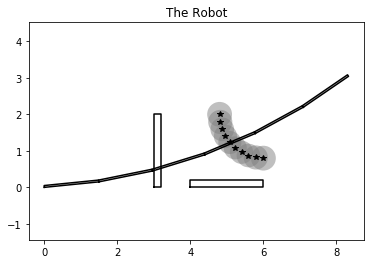

In [3]:
q_random = [0.1] * 8

fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, q_random, 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'k')
plt.show()

# single sampling run

In [4]:
# change settings for sampling
robot1.do_check_self_collision = True
robot1.ik_samples = [5, 5, 5]
for tp in path1:
    tp.p[2].set_samples(10)

In [14]:
start_time = time.time()

path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1, method='random', N=125)
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1, method='halton', N=125)

print([len(qp) for qp in path_js])
sol = get_shortest_path(path_js)
print(sol['success'])

print("Total time: " + str(time.time()-start_time))
print("Path length: " + str(sol['length']))

Collision checks: 4736
[147, 144, 107, 93, 100, 85, 70, 48, 35, 43]
converting type of Q
True
Total time: 0.6560201644897461
Path length: 2.6397929191589355


In [8]:
times = []
costs = []
cc_checks = []
for i in range(50):
    start_time = time.time()

    path_js, cc = cart_to_joint(robot1, path1, check_collision=True, scene=sc1, method='random', N=125,
                           return_cc_counter=True)

    print([len(qp) for qp in path_js])
    sol = get_shortest_path(path_js)
    print(sol['success'])
    
    times.append(time.time()-start_time)
    costs.append(sol['length'])
    cc_checks.append(cc)

print("Total time: " + str(np.mean(times)))
print("Path length: " + str(np.mean(costs)))
print("Collision checks: " + str(np.mean(cc_checks)))

[178, 172, 132, 117, 118, 118, 104, 80, 71, 87]
converting type of Q
True
[224, 215, 189, 157, 150, 125, 99, 90, 77, 72]
converting type of Q
True
[217, 206, 166, 143, 126, 120, 106, 96, 68, 71]
converting type of Q
True
[156, 138, 120, 89, 87, 77, 69, 65, 54, 67]
converting type of Q
True
[172, 161, 132, 104, 98, 98, 88, 70, 54, 79]
converting type of Q
True
[193, 188, 147, 128, 128, 113, 107, 88, 66, 81]
converting type of Q
True
[194, 180, 150, 122, 121, 108, 98, 89, 68, 80]
converting type of Q
True
[229, 217, 172, 141, 139, 122, 113, 91, 68, 75]
converting type of Q
True
[162, 160, 144, 110, 101, 100, 82, 71, 52, 76]
converting type of Q
True
[201, 179, 145, 122, 127, 127, 107, 92, 80, 101]
converting type of Q
True
[170, 155, 127, 105, 100, 95, 89, 75, 59, 84]
converting type of Q
True
[214, 195, 160, 137, 130, 128, 118, 103, 82, 97]
converting type of Q
True
[197, 195, 158, 125, 121, 108, 99, 78, 60, 79]
converting type of Q
True
[170, 162, 139, 105, 102, 93, 81, 77, 50, 58]
con

Total numner of samples for ik: 2500


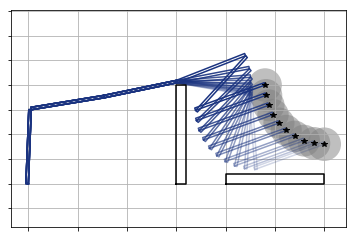

In [6]:
# total number of samples
N_tot = np.prod(robot1.ik_samples) * 20
print("Total numner of samples for ik: " + str(N_tot))

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True)
plt.show()

# multiple run sampling

In [49]:
#path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)
settings = {'max_iters': 20, 'min_js': 100, 'js_inc': 10, 'red_js_inc': 100,
            'ik_sampling_method': 'halton'}
path_js = cart_to_joint_dynamic(robot1, path1, check_collision = True, scene=sc1,
                                parameters=settings)

Processing trajectory point[ 4.8  2.   0. ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 199 joint solutions
After 0 iterations
Processing trajectory point[ 4.8182307   1.79162219  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 182 joint solutions
After 0 iterations
Processing trajectory point[ 4.87236886  1.58957583  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 155 joint solutions
After 0 iterations
Processing trajectory point[ 4.96076952  1.4         0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 138 joint solutions
After 0 iterations
Processing trajectory point[ 5.08074667  1.22865487  0.        ]
Using 'halton' sampling for cartesian tolerance
Using 'halton' sampling for redundant kinematics
Found 132 joint solutions
After

In [50]:
print([len(qp) for qp in path_js])

[199, 182, 155, 138, 132, 113, 103, 196, 196, 186]


In [51]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
True


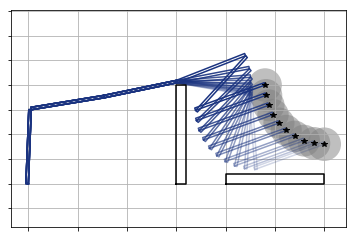

In [52]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)

ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True)
plt.show()

In [14]:
from ppr.graph_pure_python import get_shortest_path, get_shortest_path_segments

In [24]:
sol2 = get_shortest_path_segments(path_js, 8)
print(sol2)

{'success': True, 'path': [array([ 0.91144973, -0.16336282,  0.48085603, -0.98542166, -0.39192027,
        1.60930419], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.92387962, -0.35581523,
        1.56337059], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.95010918, -0.21589302,
        1.60481834], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -0.89156121, -0.33304825,
        1.81856596], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -1.0429728 , -0.11629024,
        1.90835989], dtype=float32), array([ 0.91144973, -0.16336282,  0.48085603, -1.05287123, -0.2678504 ,
        2.0698185 ], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.56963724,  0.3600274 ,
        0.95585233], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.51095361,  0.35318205,
        0.94381106], dtype=float32), array([ 0.51067042, -0.45992917,  0.19692199,  0.60162038,  0.18154772,
        0.86963832], dtype=fl

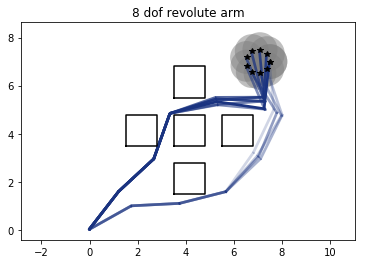

In [25]:

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol2['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
    
plt.title("8 dof revolute arm")
plt.show()

In [43]:
from ppr.sampling import iterative_bfs

In [44]:
sol3 = iterative_bfs(robot1, path1, sc1, tol=0.01, red=3, max_iter=5)
print(sol3)

converting type of Q
converting type of Q
converting type of Q
converting type of Q
converting type of Q
{'success': False, 'path': [array([ 0.18079062,  1.20246387,  0.55807251, -1.40377641, -1.31600904,
        0.17082542]), array([ 0.16080271,  1.20494366,  0.55674654, -1.45909464, -1.32609785,
        0.25506657]), array([ 0.11287982,  1.22601461,  0.55930322, -1.49390483, -1.32408905,
        0.31216303]), array([ 0.0590434 ,  1.24001253,  0.55820525, -1.50176132, -1.32634461,
        0.3632116 ]), array([ 0.02094554,  1.22252631,  0.56138444, -1.49852562, -1.32634497,
        0.41238093]), array([-0.015366  ,  1.20576227,  0.55276728, -1.48067498, -1.31042242,
        0.44030067]), array([-0.01278909,  1.14240038,  0.55309784, -1.48013055, -1.26792955,
        0.45771784]), array([  1.38224533e-03,   1.04918194e+00,   5.81591904e-01,
        -1.47035551e+00,  -1.22887993e+00,   4.59446013e-01]), array([-0.0413379 ,  1.02781534,  0.58249575, -1.3811388 , -1.22916925,
        0.433

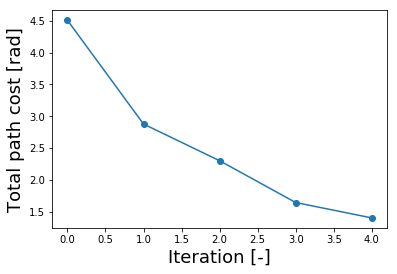

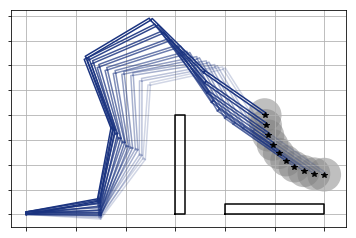

In [45]:
plt.plot(sol3['length_all_iterations'], 'o-')
plt.xlabel("Iteration [-]", fontsize=18)
plt.ylabel("Total path cost [rad]", fontsize=18)
plt.show()

fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[2])
robot1.plot_path(ax2, sol3['path'])
for r in sc1: r.plot(ax2, 'k')
for tp in path1: tp.plot(ax2)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(True)
plt.show()